In [1]:
# importing basic EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# setting figure parameters
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style='darkgrid',palette='viridis')

In [2]:
# linraries for linear regression through Scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [3]:
# linear Regression through statsmodel
import statsmodels.formula.api as smf

## Delivery Dataset

In [4]:
df = pd.read_csv('delivery_time.csv')

In [5]:
df.head(3)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6


In [6]:
df.rename(columns = {'Delivery Time': 'delivery_time','Sorting Time' : 'sorting_time'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [10]:
df.duplicated().sum()

0

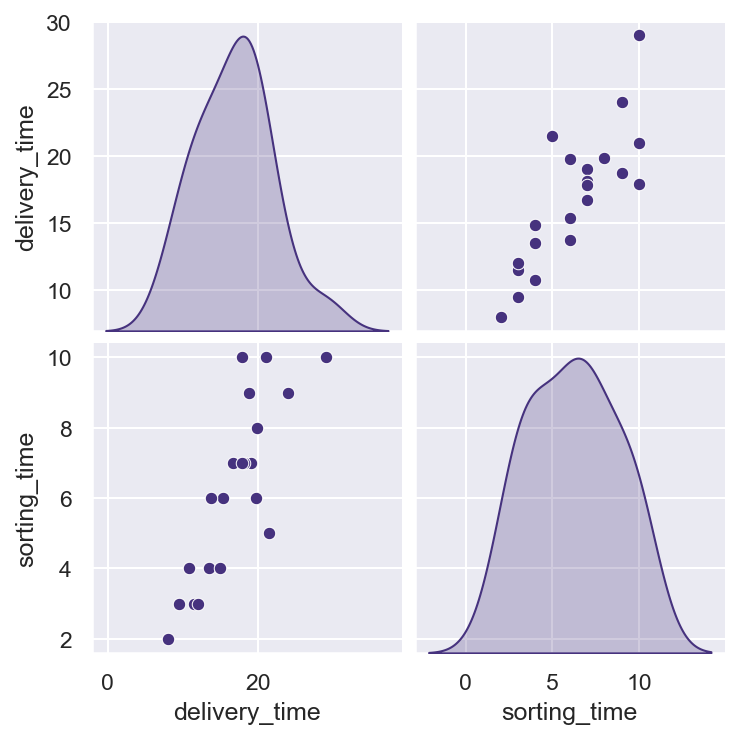

In [11]:
sns.pairplot(df,diag_kind='kde')

In [12]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


(array([0.5, 1.5]),
 [Text(0.5, 0, 'delivery_time'), Text(1.5, 0, 'sorting_time')])

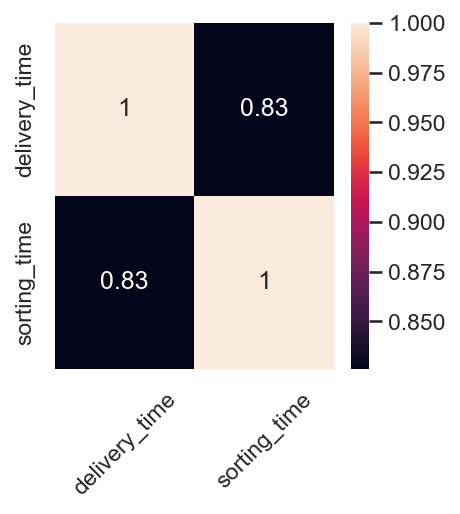

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation = 45)

### Interpretation
- Data is normally distributed
- there is a high postive correlation between sorting time and delivery time
- as the sorting time increases the delivery time also increases
- here sorting time is our feature (independent variable) & delivery time is target variable.
- we predict delivery time based on sorting time.

### simple Linear Regression through Statsmodel

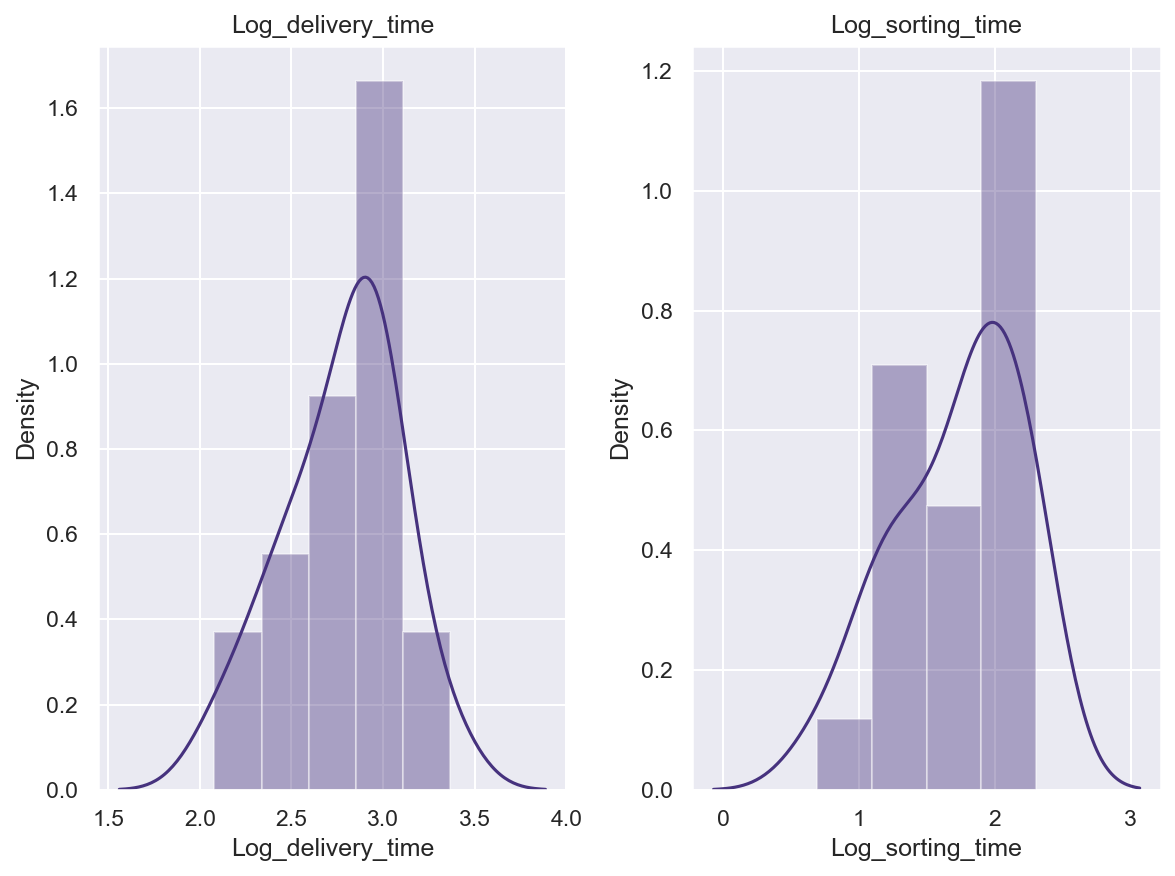

In [14]:
# Log Transfrom 

plt.figure(figsize=(8, 6))
df['Log_delivery_time'] = np.log(df['delivery_time'])
df['Log_sorting_time'] = np.log(df['sorting_time'])

plt.subplot(1,2,1)
sns.distplot(df['Log_delivery_time'])
plt.title('Log_delivery_time')

plt.subplot(1,2,2)
sns.distplot(df['Log_sorting_time'])
plt.title('Log_sorting_time')

df['Log_delivery_time'].skew(),df['Log_sorting_time'].skew()
plt.tight_layout()

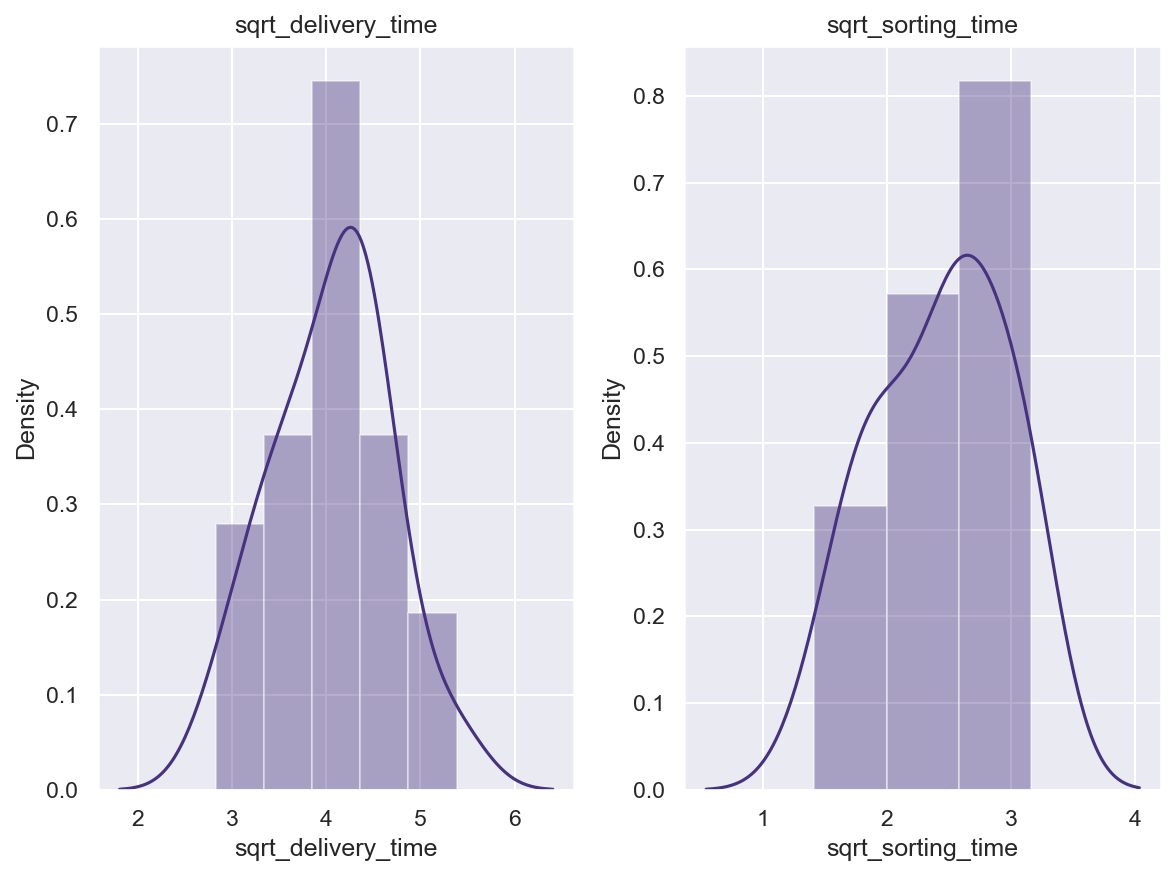

In [15]:
# sqrt Transfrom 

plt.figure(figsize=(8, 6))
df['sqrt_delivery_time'] = np.sqrt(df['delivery_time'])
df['sqrt_sorting_time'] = np.sqrt(df['sorting_time'])

plt.subplot(1,2,1)
sns.distplot(df['sqrt_delivery_time'])
plt.title('sqrt_delivery_time')

plt.subplot(1,2,2)
sns.distplot(df['sqrt_sorting_time'])
plt.title('sqrt_sorting_time')

df['sqrt_delivery_time'].skew(),df['sqrt_sorting_time'].skew()
plt.tight_layout()

In [16]:
# fitting  model on original data
model = smf.ols("delivery_time~sorting_time",data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        19:28:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# fitting  model on log transfromed data
log_model = smf.ols("Log_delivery_time~Log_sorting_time",data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Log_delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                        19:28:31   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
Log_sorting_time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# fitting model on sqrt transformed data
sqrt_model = smf.ols("sqrt_delivery_time~sqrt_sorting_time",data = df).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           8.48e-07
Time:                        19:28:31   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6135      0.349      4.628      0.000       0.884       2.343
sqrt_sorting_time     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### from above comparision we can say that the log transfromed data data is giving the best accuracy as compared to sqrt  transformation or original data, so we keep our model fitted on original data set
- original data model - accuracy: 68%
- log transformed data = sccuracy: 77%
- sqrt transfromed data = 73%

### checking metrics of best performing data

In [19]:
# r squared  & adjuested R squared values
print('Rsquared: ',log_model.rsquared)
print('Adjusted Rsquared',log_model.rsquared_adj)
print('Accuract: ',100*log_model.rsquared)

Rsquared:  0.77216134926874
Adjusted Rsquared 0.7601698413355158
Accuract:  77.216134926874


In [20]:
# chekcing model coefficient
log_model.params

Intercept           1.741987
Log_sorting_time    0.597522
dtype: float64

In [21]:
# checking model p values 
log_model.pvalues

Intercept           5.921137e-11
Log_sorting_time    1.601539e-07
dtype: float64

### simple Linear Regression through Scikit learn

In [22]:
# splitting the data into feature & target columns

x = np.array(df['sorting_time']).reshape((-1, 1))
y = df['delivery_time']

In [23]:
# train test split of feature & target variables 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [24]:
# creating a model instance
model = LinearRegression()

In [25]:
# training the model
model.fit(x_train, y_train)

LinearRegression()

In [26]:
model.coef_

array([1.42411079])

In [27]:
# making predictions using trained model
y_pred = model.predict(x_test)

In [28]:
# checking model parameters
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
accuracy = 100*r2_score(y_test,y_pred)
print('Mean absolute Error: ',mae)
print('Mean squared Error: ',mse)
print('root Mean squared Error: ',rmse)
print('R squared',r2_score(y_test,y_pred))
print('accuracy',accuracy)

Mean absolute Error:  2.427370262390672
Mean squared Error:  7.268834048738202
root Mean squared Error:  2.6960775301793904
R squared 0.8035981073023992
accuracy 80.35981073023993


- mean absolute error & root mean squared errors are low (lower the values model perfroms better)
- R squared value is high (high R squared value, model performs well)

### Final Interpretation

- **model trained by ols method using  stats model gave an accuracy of 68%**
- **model trained using sklearn's linear regression model gave a accuracy of 80%**
- overall sklearn performed well for the given data

## Salary Dataset

In [29]:
sal = pd.read_csv('Salary_Data.csv')
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [31]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [32]:
sal.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [33]:
sal.duplicated().sum()

0

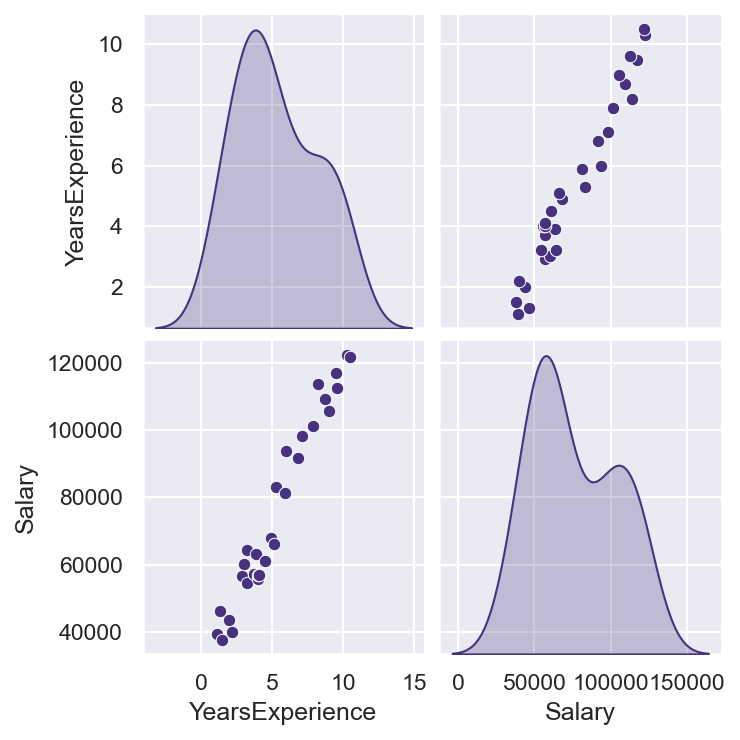

In [34]:
sns.pairplot(data = sal, diag_kind='kde')

In [35]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

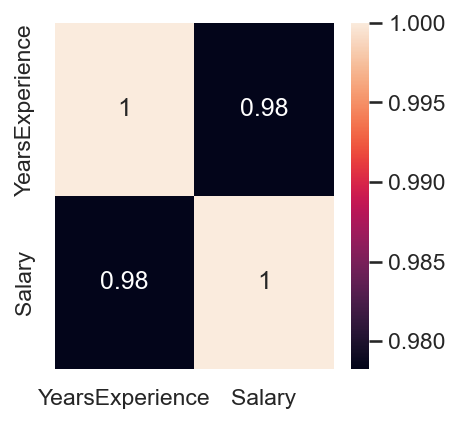

In [36]:
sns.heatmap(sal.corr(),annot=True)

### Interpretation
- Data is sort of normally distributed
- there is a very high postive correlation between year of experience and salary
- as the year of experience increases the  salary also increases
- here year of experience is our feature (independent variable) &  salary is target variable.
- we predict salary based on year of experience.

### simple Linear Regression through Statsmodel

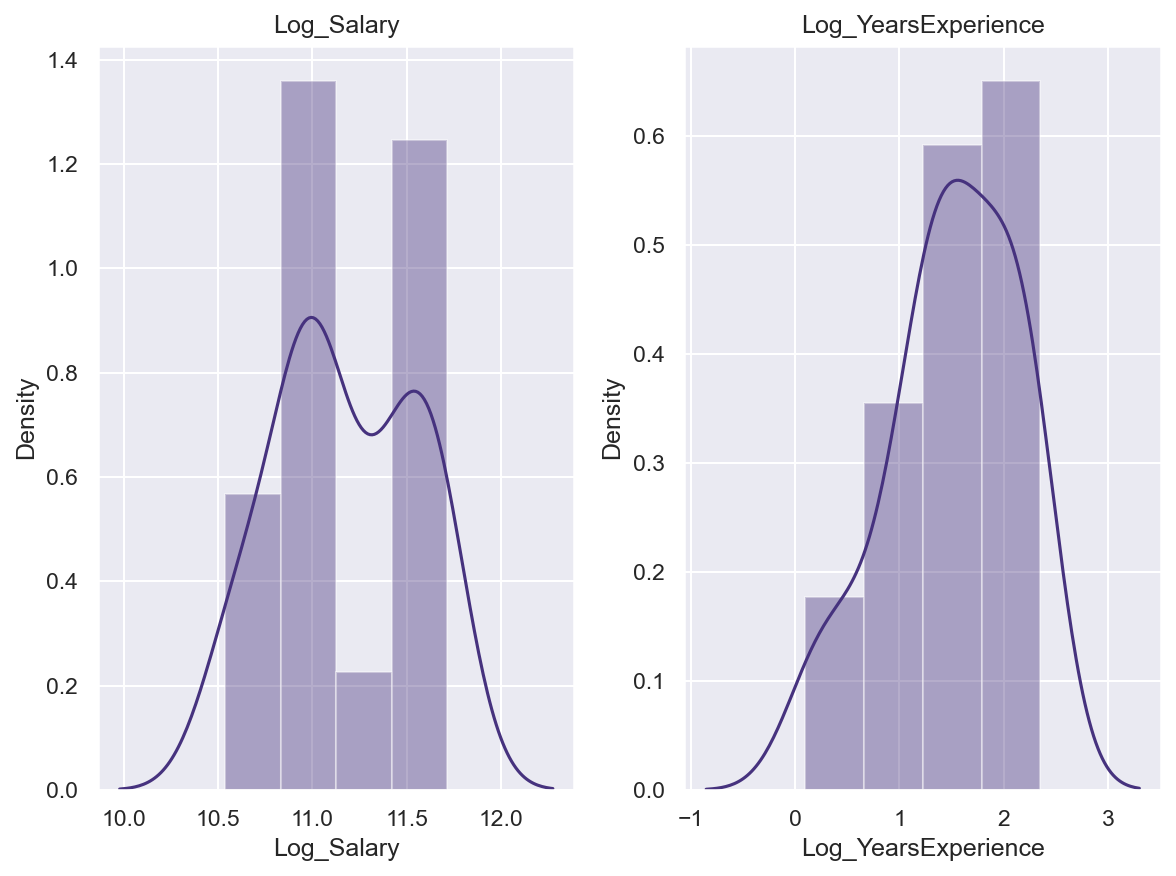

In [37]:
# Log Transfrom 

plt.figure(figsize=(8, 6))
sal['Log_Salary'] = np.log(sal['Salary'])
sal['Log_YearsExperience'] = np.log(sal['YearsExperience'])

plt.subplot(1,2,1)
sns.distplot(sal['Log_Salary'])
plt.title('Log_Salary')

plt.subplot(1,2,2)
sns.distplot(sal['Log_YearsExperience'])
plt.title('Log_YearsExperience')

sal['Log_Salary'].skew(),sal['Log_YearsExperience'].skew()
plt.tight_layout()

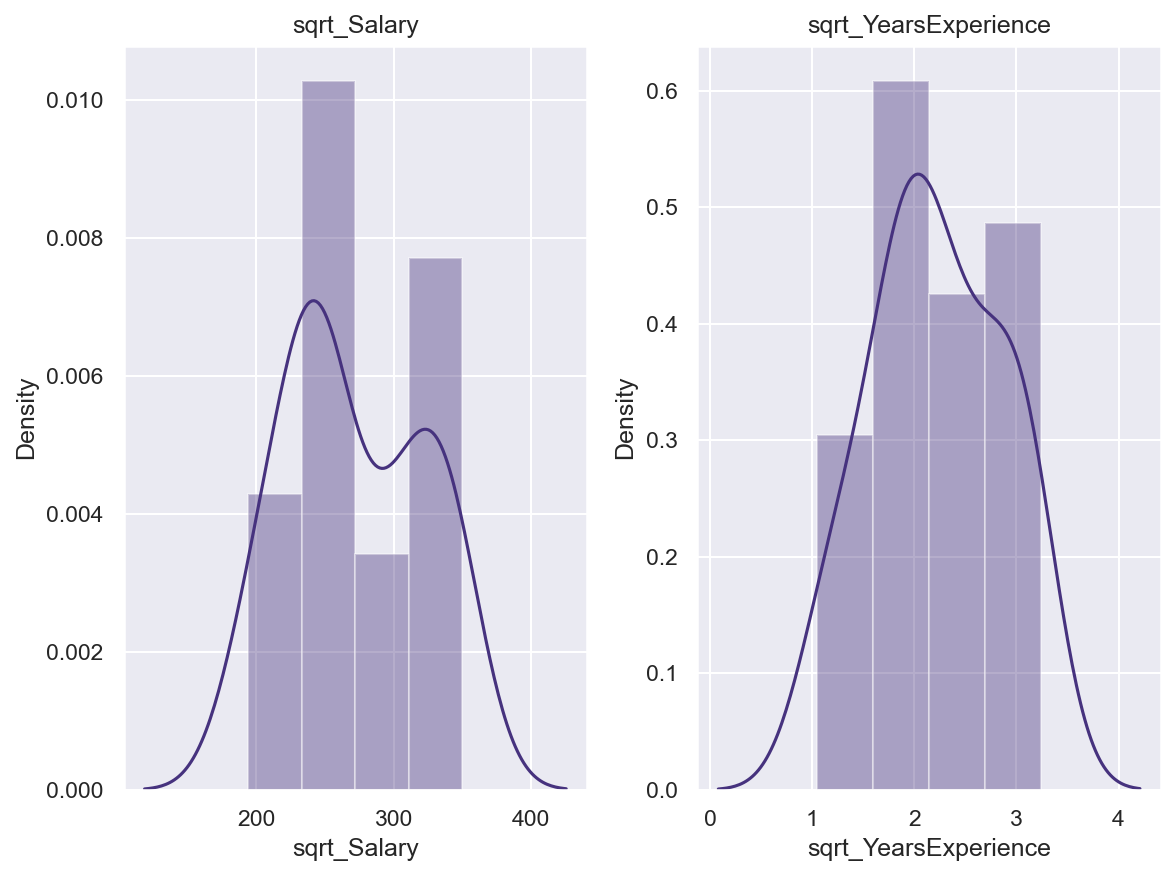

In [38]:
# sqrt Transfrom
plt.figure(figsize=(8, 6))
sal['sqrt_Salary'] = np.sqrt(sal['Salary'])
sal['sqrt_YearsExperience'] = np.sqrt(sal['YearsExperience'])

plt.subplot(1,2,1)
sns.distplot(sal['sqrt_Salary'])
plt.title('sqrt_Salary')

plt.subplot(1,2,2)
sns.distplot(sal['sqrt_YearsExperience'])
plt.title('sqrt_YearsExperience')

sal['sqrt_Salary'].skew(),sal['sqrt_YearsExperience'].skew()
plt.tight_layout()

In [39]:
# fitting the on original data model
model = smf.ols("Salary~YearsExperience",data = sal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        19:28:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# fitting model on log transfromed data
log_model = smf.ols("Log_Salary~Log_YearsExperience",data = sal).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           7.40e-16
Time:                        19:28:39   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.3280      0.056    184.868      0.000      10.214      10.442
Log_YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# fitting model on sqrt transfromed data
sqrt_model = smf.ols("sqrt_Salary~sqrt_YearsExperience",data = sal).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           7.58e-19
Time:                        19:28:39   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              103.5680      8.178     12.663      0.000      86.815     120.321
sqrt_YearsExperience    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### from above comparision we can say that the original data is giving the best accuracy as compared to sqrt or log transformation, so we keep our model fitted on original data set
- original data model - accuracy: 95%
- log transformed data = sccuracy: 90%
- sqrt transfromed data = 94%

### checking metrics on best perfroming data

In [42]:
# checking model sumary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        19:28:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# r squared  & adjuested R squared values
print('Rsquared: ',model.rsquared)
print('Adjusted Rsquared',model.rsquared_adj)
print('Accuract: ',100*model.rsquared)

Rsquared:  0.9569566641435086
Adjusted Rsquared 0.9554194021486339
Accuract:  95.69566641435085


In [44]:
# chekcing model coefficient
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [45]:
# checking model p values 
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

### simple Linear Regression through Scikit learn

In [46]:
# splitting the data into feature & target columns
x = np.array(sal['YearsExperience']).reshape((-1, 1))
y = sal['Salary']

In [47]:
# train test split of feature & target variables 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [48]:
# creating a model instance
model = LinearRegression()

In [49]:
# training the model
model.fit(x_train,y_train)

LinearRegression()

In [50]:
# making predictions using trained model
y_pred = model.predict(x_test)

In [51]:
# checking model parameters
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
accuracy = 100*r2_score(y_test,y_pred)
print('Mean absolute Error: ',mae)
print('Mean squared Error: ',mse)
print('root Mean squared Error: ',rmse)
print('R squared',r2_score(y_test,y_pred))
print('accuracy',accuracy)

Mean absolute Error:  1907.5525554956257
Mean squared Error:  4934969.878489006
root Mean squared Error:  2221.4792095558773
R squared 0.993422386435995
accuracy 99.3422386435995


### Final Interpretation

- **model trained by ols method using  stats model gave an accuracy of 95%**
- **model trained using sklearn's linear regression model gave a accuracy of 99%**
- overall both model performed well with a slight difference in accuracy for the given data